In [98]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials
from azure.ai.vision.imageanalysis import ImageAnalysisClient
from azure.ai.vision.imageanalysis.models import VisualFeatures
from azure.core.credentials import AzureKeyCredential
import matplotlib.pyplot as plt
from array import array
import os
from PIL import Image, ImageDraw, ImageFilter
import sys
import time
import os
import io

def setup():
    '''
    Authenticate
    Authenticates your credentials and creates a client.
    '''
    subscription_key = os.environ["VISION_KEY"]
    endpoint = os.environ["VISION_ENDPOINT"]
    computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))
    '''
    END - Authenticate
    '''
    return computervision_client

In [127]:
img = open("D:/FACULTATE/SEM4/AI/Lab3/test2.jpeg", "rb")
resultat_asteptat = ["Succes in rezolvarea", "tEMELOR la", "LABORAtoaree de", "Inteligenta Artificiala!"]
def preluare_imagine(img):
    computervision_client = setup()
    read_response = computervision_client.read_in_stream(
        image=img,
        mode="Printed",
        raw=True
    )
    # print(read_response.as_dict())
    
    operation_id = read_response.headers['Operation-Location'].split('/')[-1]
    while True:
        read_result = computervision_client.get_read_result(operation_id)
        if read_result.status not in ['notStarted', 'running']:
            break
        time.sleep(1)
    
    # Print the detected text, line by line
    resultRead = ""
    resultLinii = []
    resultCuvinte = []
    
    if read_result.status == OperationStatusCodes.succeeded:
        for text_result in read_result.analyze_result.read_results:
            for line in text_result.lines:
                resultLinii.append(line.text)
                resultRead += str(line.text) 
                for word in line.words:
                    resultCuvinte.append(word.text)
    
    print(resultRead)
    print(resultLinii)
    print(resultCuvinte)
    return resultLinii

In [119]:
import textdistance

def distantaJaroWinkler(resultat_asteptat, resultRead):
    distanta_jaro_winkler = 0
    for linie_generata, linie_asteptata in zip(resultRead, resultat_asteptat):
        distanta_jaro_winkler += textdistance.jaro_winkler.normalized_similarity(linie_generata, linie_asteptata)
    return distanta_jaro_winkler / len(resultat_asteptat)

In [120]:
import Levenshtein

def distantaLevenshtein(resultat_asteptat, resultRead):
    nivel_caracter = Levenshtein.distance(resultat_asteptat, resultRead)
    return nivel_caracter

In [144]:
def test_intput(imagine_prelucrata):
    plt.imshow(imagine_prelucrata)
    plt.show()
    image_bytes = io.BytesIO()
    imagine_prelucrata.save(image_bytes, format='JPEG')
    image_bytes.seek(0)
    image_buffered_reader = io.BufferedReader(image_bytes)
    
    R_R = preluare_imagine(image_buffered_reader)
    print(R_R)
    print(distantaJaroWinkler(resultat_asteptat, R_R))
    print(distantaLevenshtein(resultat_asteptat, R_R))

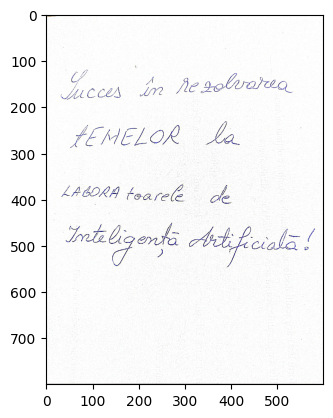

In [145]:
import tempfile

imagine = Image.open("D:/FACULTATE/SEM4/AI/Lab3/test2.jpeg")
imagine_procesata = imagine.resize((600, 800))
imagine_procesata_COUNTOUR = imagine_procesata.filter(ImageFilter.CONTOUR)
plt.imshow(imagine_procesata_COUNTOUR)

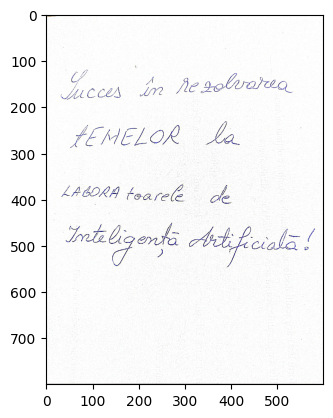

Lucces in resolvareaTEMELOR laLABORA toarele deInteligenta Artificialà!
['Lucces in resolvarea', 'TEMELOR la', 'LABORA toarele de', 'Inteligenta Artificialà!']
['Lucces', 'in', 'resolvarea', 'TEMELOR', 'la', 'LABORA', 'toarele', 'de', 'Inteligenta', 'Artificialà!']
['Lucces in resolvarea', 'TEMELOR la', 'LABORA toarele de', 'Inteligenta Artificialà!']
0.9466176470588235
4


In [146]:
test_intput(imagine_procesata_COUNTOUR)

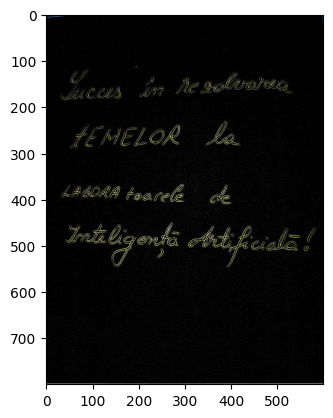

Succes in resolvarcaTEMELOR laLABORA toarele deInteligenta Artificialà!
['Succes in resolvarca', 'TEMELOR la', 'LABORA toarele de', 'Inteligenta Artificialà!']
['Succes', 'in', 'resolvarca', 'TEMELOR', 'la', 'LABORA', 'toarele', 'de', 'Inteligenta', 'Artificialà!']
['Succes in resolvarca', 'TEMELOR la', 'LABORA toarele de', 'Inteligenta Artificialà!']
0.9532843137254902
4


In [147]:
imagine_procesata_2 = imagine.resize((600, 800))
imagine_procesata_2 = imagine_procesata_2.filter(ImageFilter.FIND_EDGES)
test_intput(imagine_procesata_2)

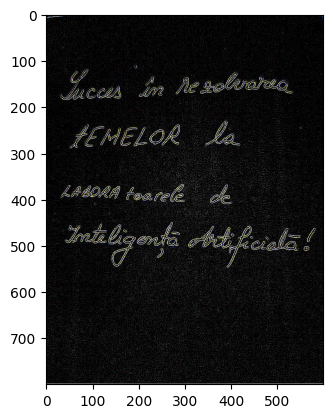

Succes in resolvareaHEMELOR laLABORA toarele deInteligenta Artificialà!
['Succes in resolvarea', 'HEMELOR la', 'LABORA toarele de', 'Inteligenta Artificialà!']
['Succes', 'in', 'resolvarea', 'HEMELOR', 'la', 'LABORA', 'toarele', 'de', 'Inteligenta', 'Artificialà!']
['Succes in resolvarea', 'HEMELOR la', 'LABORA toarele de', 'Inteligenta Artificialà!']
0.9582843137254902
4


In [149]:
imagine_procesata_3 = imagine.resize((600, 800))
imagine_procesata_3 = imagine_procesata_2.filter(ImageFilter.CONTOUR)
imagine_procesata_3 = imagine_procesata_2.filter(ImageFilter.EDGE_ENHANCE)
test_intput(imagine_procesata_3)